<h1>
    <font color=0000FF>
        Using Metabolites in the Wastewater to measure Drug Consumption - Exploring Relationships
    </font>
</h1>
<h3>
    <font color=89CFF0>
        An Open Source Data Project using Data from the European Monitoring Centre for Drugs and Drug Addiction (EMCDDA) and the SCORE network
    </font>
</h3>      


<img src="https://cdn.pixabay.com/photo/2015/12/22/08/27/plumbing-1103725_960_720.jpg">
Picture taken from <a href="https://pixabay.com/de/photos/installation-industrie-rohre-1103725/">Pixabay</a>, from the user <a href="https://pixabay.com/de/users/archermech-1801998/">"Archermech"</a>.

<h2>
    <font color=0096FF>
        Content & Structure<a id='start'></a>
    </font>
</h2>
<h3>
    <font color=0096FF>
        <p>
            <a href='#first_chapter'>1. Library and Data Import</a>         
        <p>
            <a href='#second_chapter'>2. Exploring Relationships</a>
        <p>
            <a href='#third_chapter'>3. Answering the previous Questions</a>
        <p>
            <a href='#fourth_chapter'>4. Going further</a>
        <p>
            <a href='#fifth_chapter'>5. Export and further Questions</a>
    </font>
</h3>  

<h3>
    <font color=0096FF>
        Recap
    </font>
</h3>
<p>
    In the previous notebook, we sourced, selected and cleaned the dataset in use. In the end, the following questions were chosen to be researched further. To gain insights towards these questions, the relationships inside the dataset will be explored throughout this notebook.
<p>
<ul>
    <li>
        The cannabis consumption seems to be rather low in comparison to the consumption of the other drugs. Where is the cannabis consumption higher than the consumption of the other drugs? What trend can be discovered?
    </li>
    <p>
    <li>
        Which cities are outliers in the drug consumption?
    </li>
    <p>
    <li>
        Is there a connection, and how strong is this connection, between the amount of mg/1000p/day in the wastewater and the population of the specific cities?
    </li>
    <p>
    <li>
        How much is the average difference between weekday and weekend consumption?
    </li>
    <p>
    <li>
        How did the global pandemic influence the drug consumption?
    </li>
</ul>

<h2>
    <font color=0096FF>
        <a href='#start'>1. Library and Data Import</a><a id='first_chapter'></a>
    </font>
</h2>

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
from IPython.core.interactiveshell import InteractiveShell

In [2]:
# Setting up Options

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Setting up path for import/export/etc.

path = r'X:\Data_Analytic\JUPYTER\Achievement 6'

In [4]:
# Importing the dataframe

df_wastewater = pd.read_pickle(os.path.join(path,'02 Data','02 Prepared Data','df_wastewater_post_6-1.pkl'))

In [5]:
# Checking the dataframe

df_wastewater.shape

df_wastewater.info()

df_wastewater.head()

for i in list(df_wastewater):
    print(i,len(df_wastewater[df_wastewater[i].isna()]))

(2569, 18)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2568
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2569 non-null   Int64  
 1   metabolite    2569 non-null   string 
 2   SiteID        2569 non-null   string 
 3   country       2569 non-null   string 
 4   city          2569 non-null   string 
 5   latitude      2569 non-null   Float64
 6   longitude     2569 non-null   Float64
 7   population    2569 non-null   Int64  
 8   Wednesday     2569 non-null   Float64
 9   Thursday      2569 non-null   Float64
 10  Friday        2569 non-null   Float64
 11  Saturday      2569 non-null   Float64
 12  Sunday        2569 non-null   Float64
 13  Monday        2569 non-null   Float64
 14  Tuesday       2569 non-null   Float64
 15  Weekday mean  2569 non-null   Float64
 16  Weekend mean  2569 non-null   Float64
 17  Daily mean    2569 non-null   Float64
dtypes: Float64(12), Int64(2), st

,year,metabolite,SiteID,country,city,latitude,longitude,population,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
0,2021,amphetamine,AT001,AT,Graz,47.070713,15.439504,487040,47.15,37.48,37.95,38.02,38.14,35.82,35.45,40.03,37.48,38.57
1,2021,cannabis,AT001,AT,Graz,47.070713,15.439504,487040,54.77,80.42,60.1,53.88,50.46,77.04,233.51,122.9,60.37,87.17
2,2021,cocaine,AT001,AT,Graz,47.070713,15.439504,487040,127.6,121.48,137.75,174.94,179.55,117.31,111.91,120.33,152.39,138.65
3,2021,MDMA,AT001,AT,Graz,47.070713,15.439504,487040,5.82,4.53,5.27,16.56,17.37,10.14,7.83,6.06,12.33,9.64
4,2021,methamphetamine,AT001,AT,Graz,47.070713,15.439504,487040,12.44,11.24,14.99,9.33,18.66,9.33,15.66,13.11,13.08,13.09


year 0
metabolite 0
SiteID 0
country 0
city 0
latitude 0
longitude 0
population 0
Wednesday 0
Thursday 0
Friday 0
Saturday 0
Sunday 0
Monday 0
Tuesday 0
Weekday mean 0
Weekend mean 0
Daily mean 0


<h2>
    <font color=0096FF>
        <a href='#start'>2. Exploring Relationships</a><a id='second_chapter'></a>
    </font>
</h2>

[Text(0.5, 1.0, 'amphetamine')]

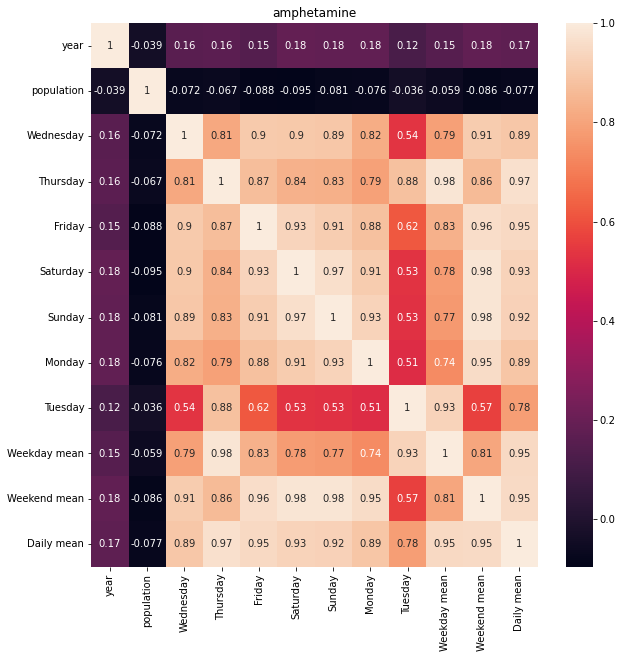

[Text(0.5, 1.0, 'cannabis')]

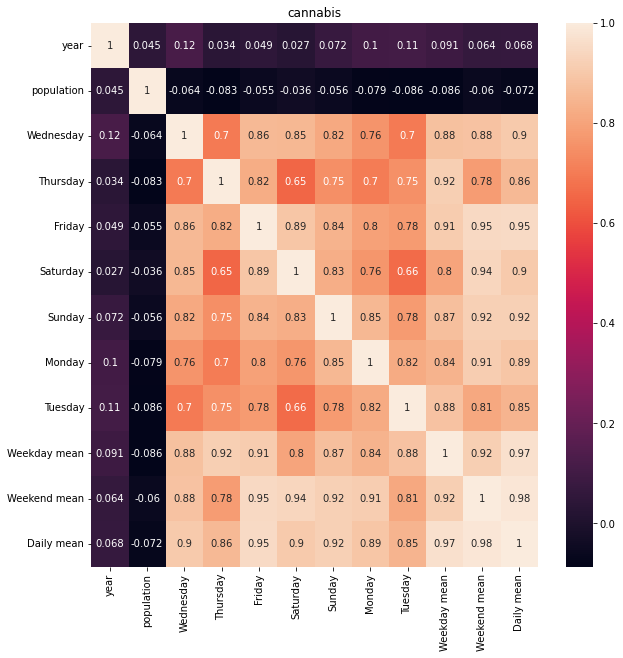

[Text(0.5, 1.0, 'cocaine')]

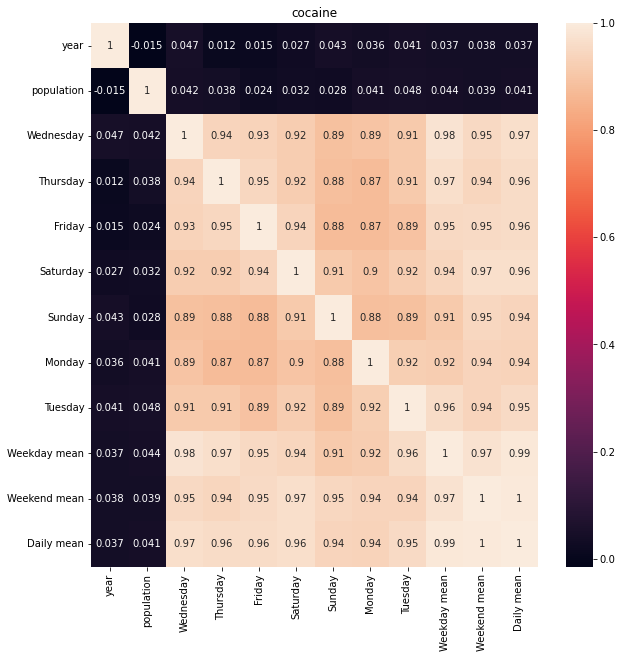

[Text(0.5, 1.0, 'MDMA')]

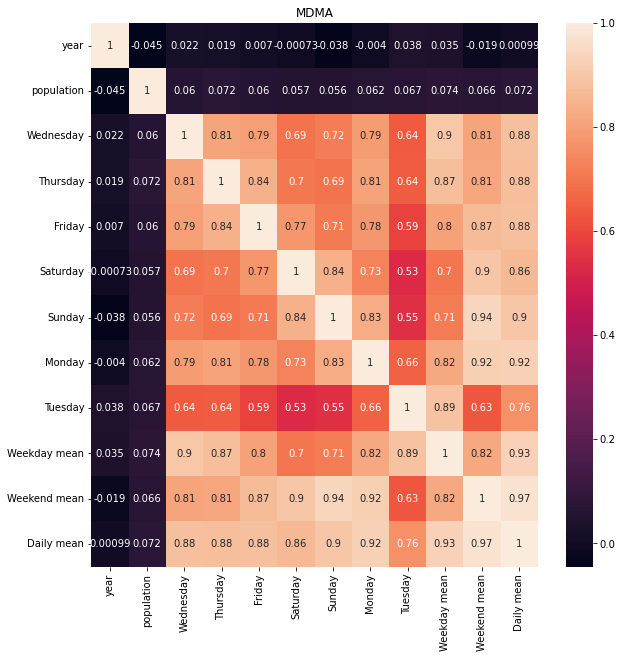

[Text(0.5, 1.0, 'methamphetamine')]

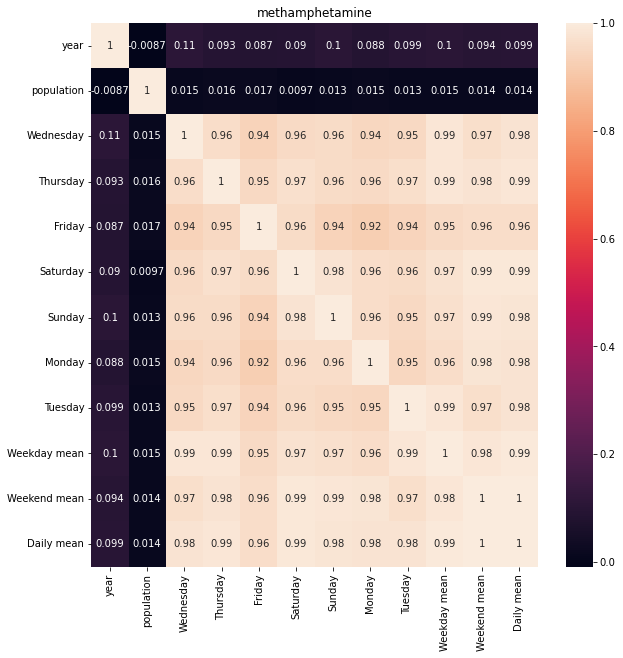

In [6]:
# This cell creates a heatmap for each drug

df_wastewater_drug_list = list(dict.fromkeys(df_wastewater.metabolite.tolist()))

for i in df_wastewater_drug_list:
    
    df_wastewater_drug_specific = df_wastewater[df_wastewater['metabolite']==i]
    
    f,ax = plt.subplots(figsize=(10,10))
    
    sns.heatmap(df_wastewater_drug_specific[['year','population','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Weekday mean','Weekend mean','Daily mean']].corr(),annot=True,ax=ax).set(title=i)
    
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','02 Relation Exploration','Heatmap '+i+'.png'),bbox_inches='tight')
    
    plt.show();

<h4>
    <font color=0096FF>
        What do these heatmaps tell us?
    </font>
</h4>
<p>
    Instead of showing a heatmap of all daily measurements with each other, I decided to show a drug specific heatmap. The truth is, the complete heatmap is not informative. The complete heatmap would show a high correlation with nearly all values, similar to the methamphetamine heatmap. Therefore, I decided to split the dataset into drug specific ones.
<p>
    The methamphetamine heatmap shows, that the measurement of any day has a high correlation with any other day. In conclusion, <b>the methamphetamine drug consumption is similar throughout all days, all cities and years.</b>
<p>
    The cocaine heatmap is close to the methamphetamine heatmap. Although the correlations are not as strong with each other as in the methamphetamine heatmap, <b>the cocaine measurements show a similar consumption throughout the days, cities and years.</b>
<p>
    The cannabis heatmap is inbetween the cocaine and amphetamine heatmaps and the amphetamine and MDMA heatmaps. <b>The cannabis heatmap shows high correlation throughout days, cities and years, but less correlation overall.</b>
<p>
    The amphetamine and MDMA heatmaps are similar to each other but stand out in comparison to the methamphetamine, cocaine, and cannabis heatmaps. <b>The amphetamine and MDMA heatmaps show less overall correlation and have the smallest correlation on tuesdays.</b>
<p>
    To summarize, the consumption of methamphetamine and cocaine is more consistent than the consumption of amphetamine and MDMA, and the consumption of cannabis is inbetween the other 4 consuming behaviors.

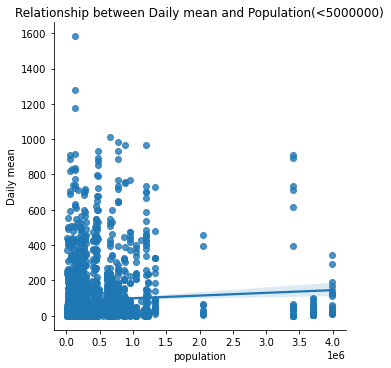

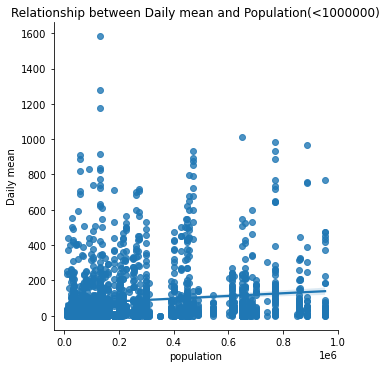

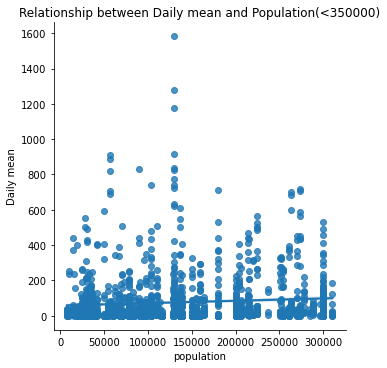

In [7]:
# Testing the relationship of population and daily mean

df_wastewater['population']=df_wastewater['population'].astype(int)
df_wastewater['Daily mean']=df_wastewater['Daily mean'].astype(float)

df_wastewater_scatter=df_wastewater.loc[df_wastewater['population']<5000000]

sns.lmplot(x='population',y='Daily mean',data=df_wastewater_scatter).set(title='Relationship between Daily mean and Population(<5000000)');

df_wastewater_scatter2=df_wastewater.loc[df_wastewater['population']<1000000]

sns.lmplot(x='population',y='Daily mean',data=df_wastewater_scatter2).set(title='Relationship between Daily mean and Population(<1000000)');

df_wastewater_scatter3=df_wastewater.loc[df_wastewater['population']<350000]

sns.lmplot(x='population',y='Daily mean',data=df_wastewater_scatter3).set(title='Relationship between Daily mean and Population(<350000)');

<h4>
    <font color=0096FF>
        What do the scatterplots tell us?
    </font>
</h4>
<p>
    The scatterplot suggest a trend, that increased population results in higher drug consumption. For a more diverse picture I created 3 charts, one with a population cap of below 5000000, one with below 1000000, and one with below 350000. I did this, because I wondered how much outliers like Istanbul (population of around 15000000) would impact the relationship.
<p>
    Although there is some correlation, the correlation can be viewed as unrelevant (see correlation table below).

In [8]:
df_wastewater[['population','Daily mean']].corr()

,population,Daily mean
population,1.000000,0.007699
Daily mean,0.007699,1.000000


amphetamine


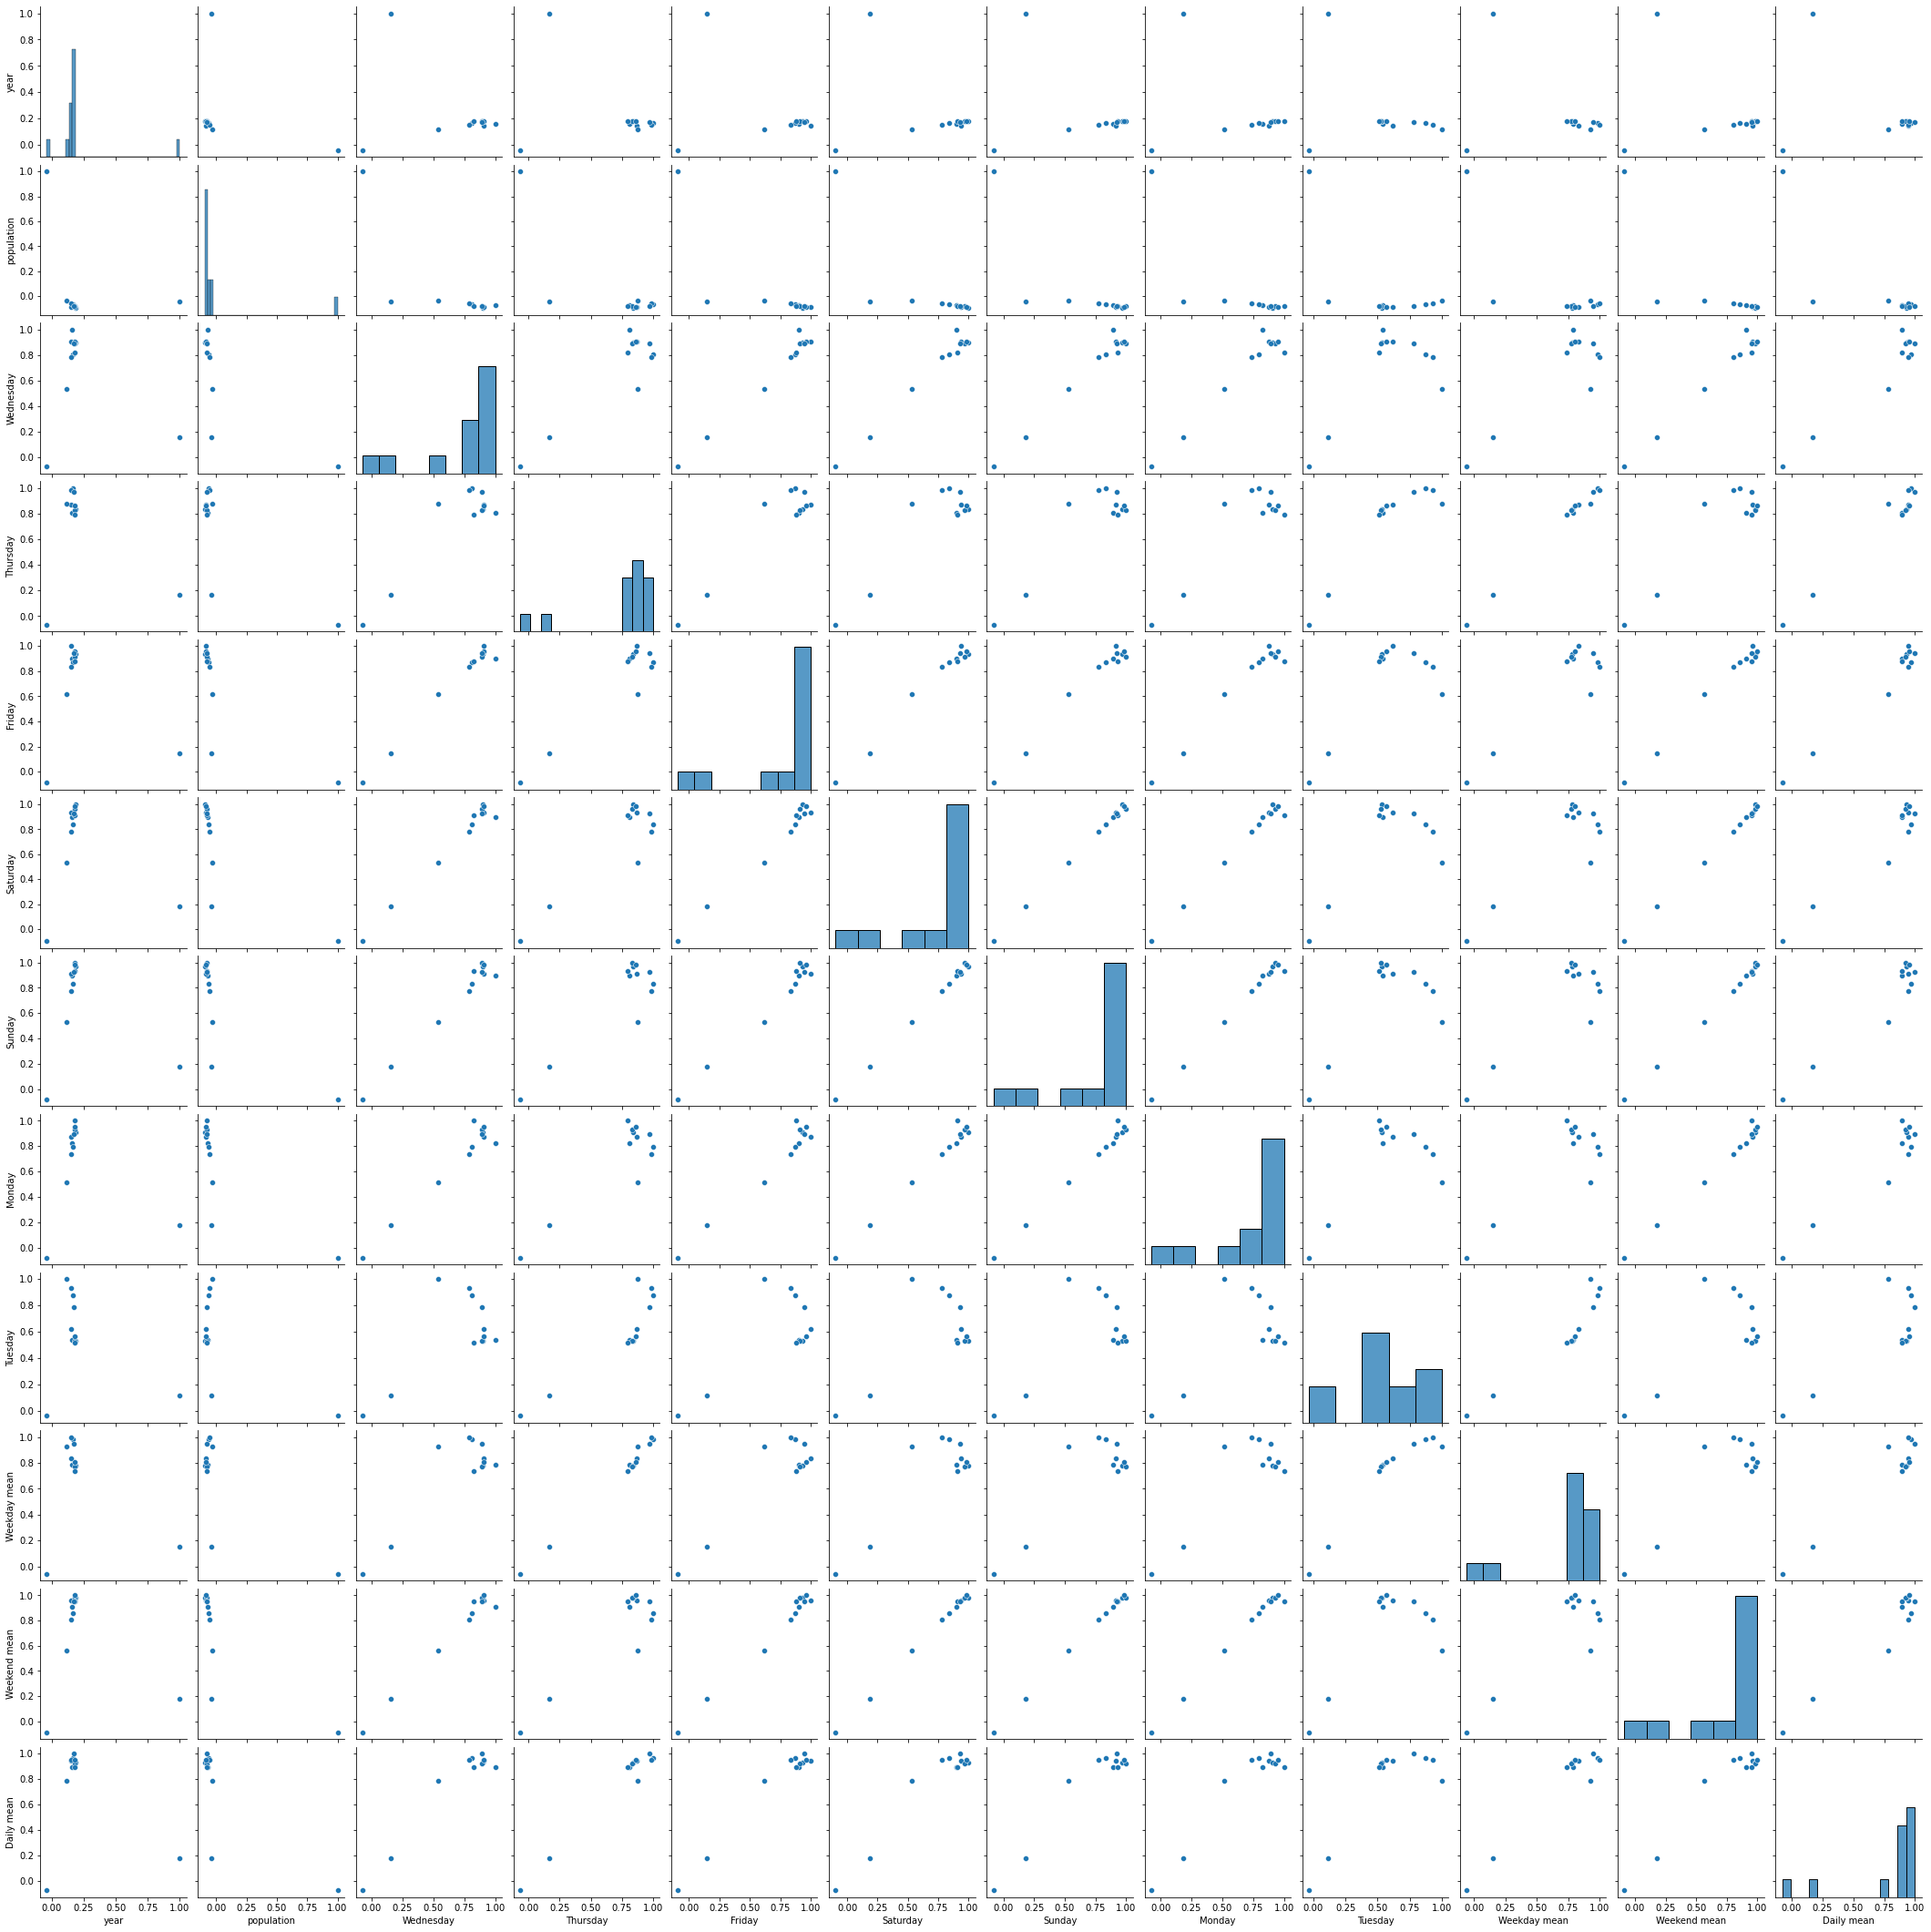

cannabis


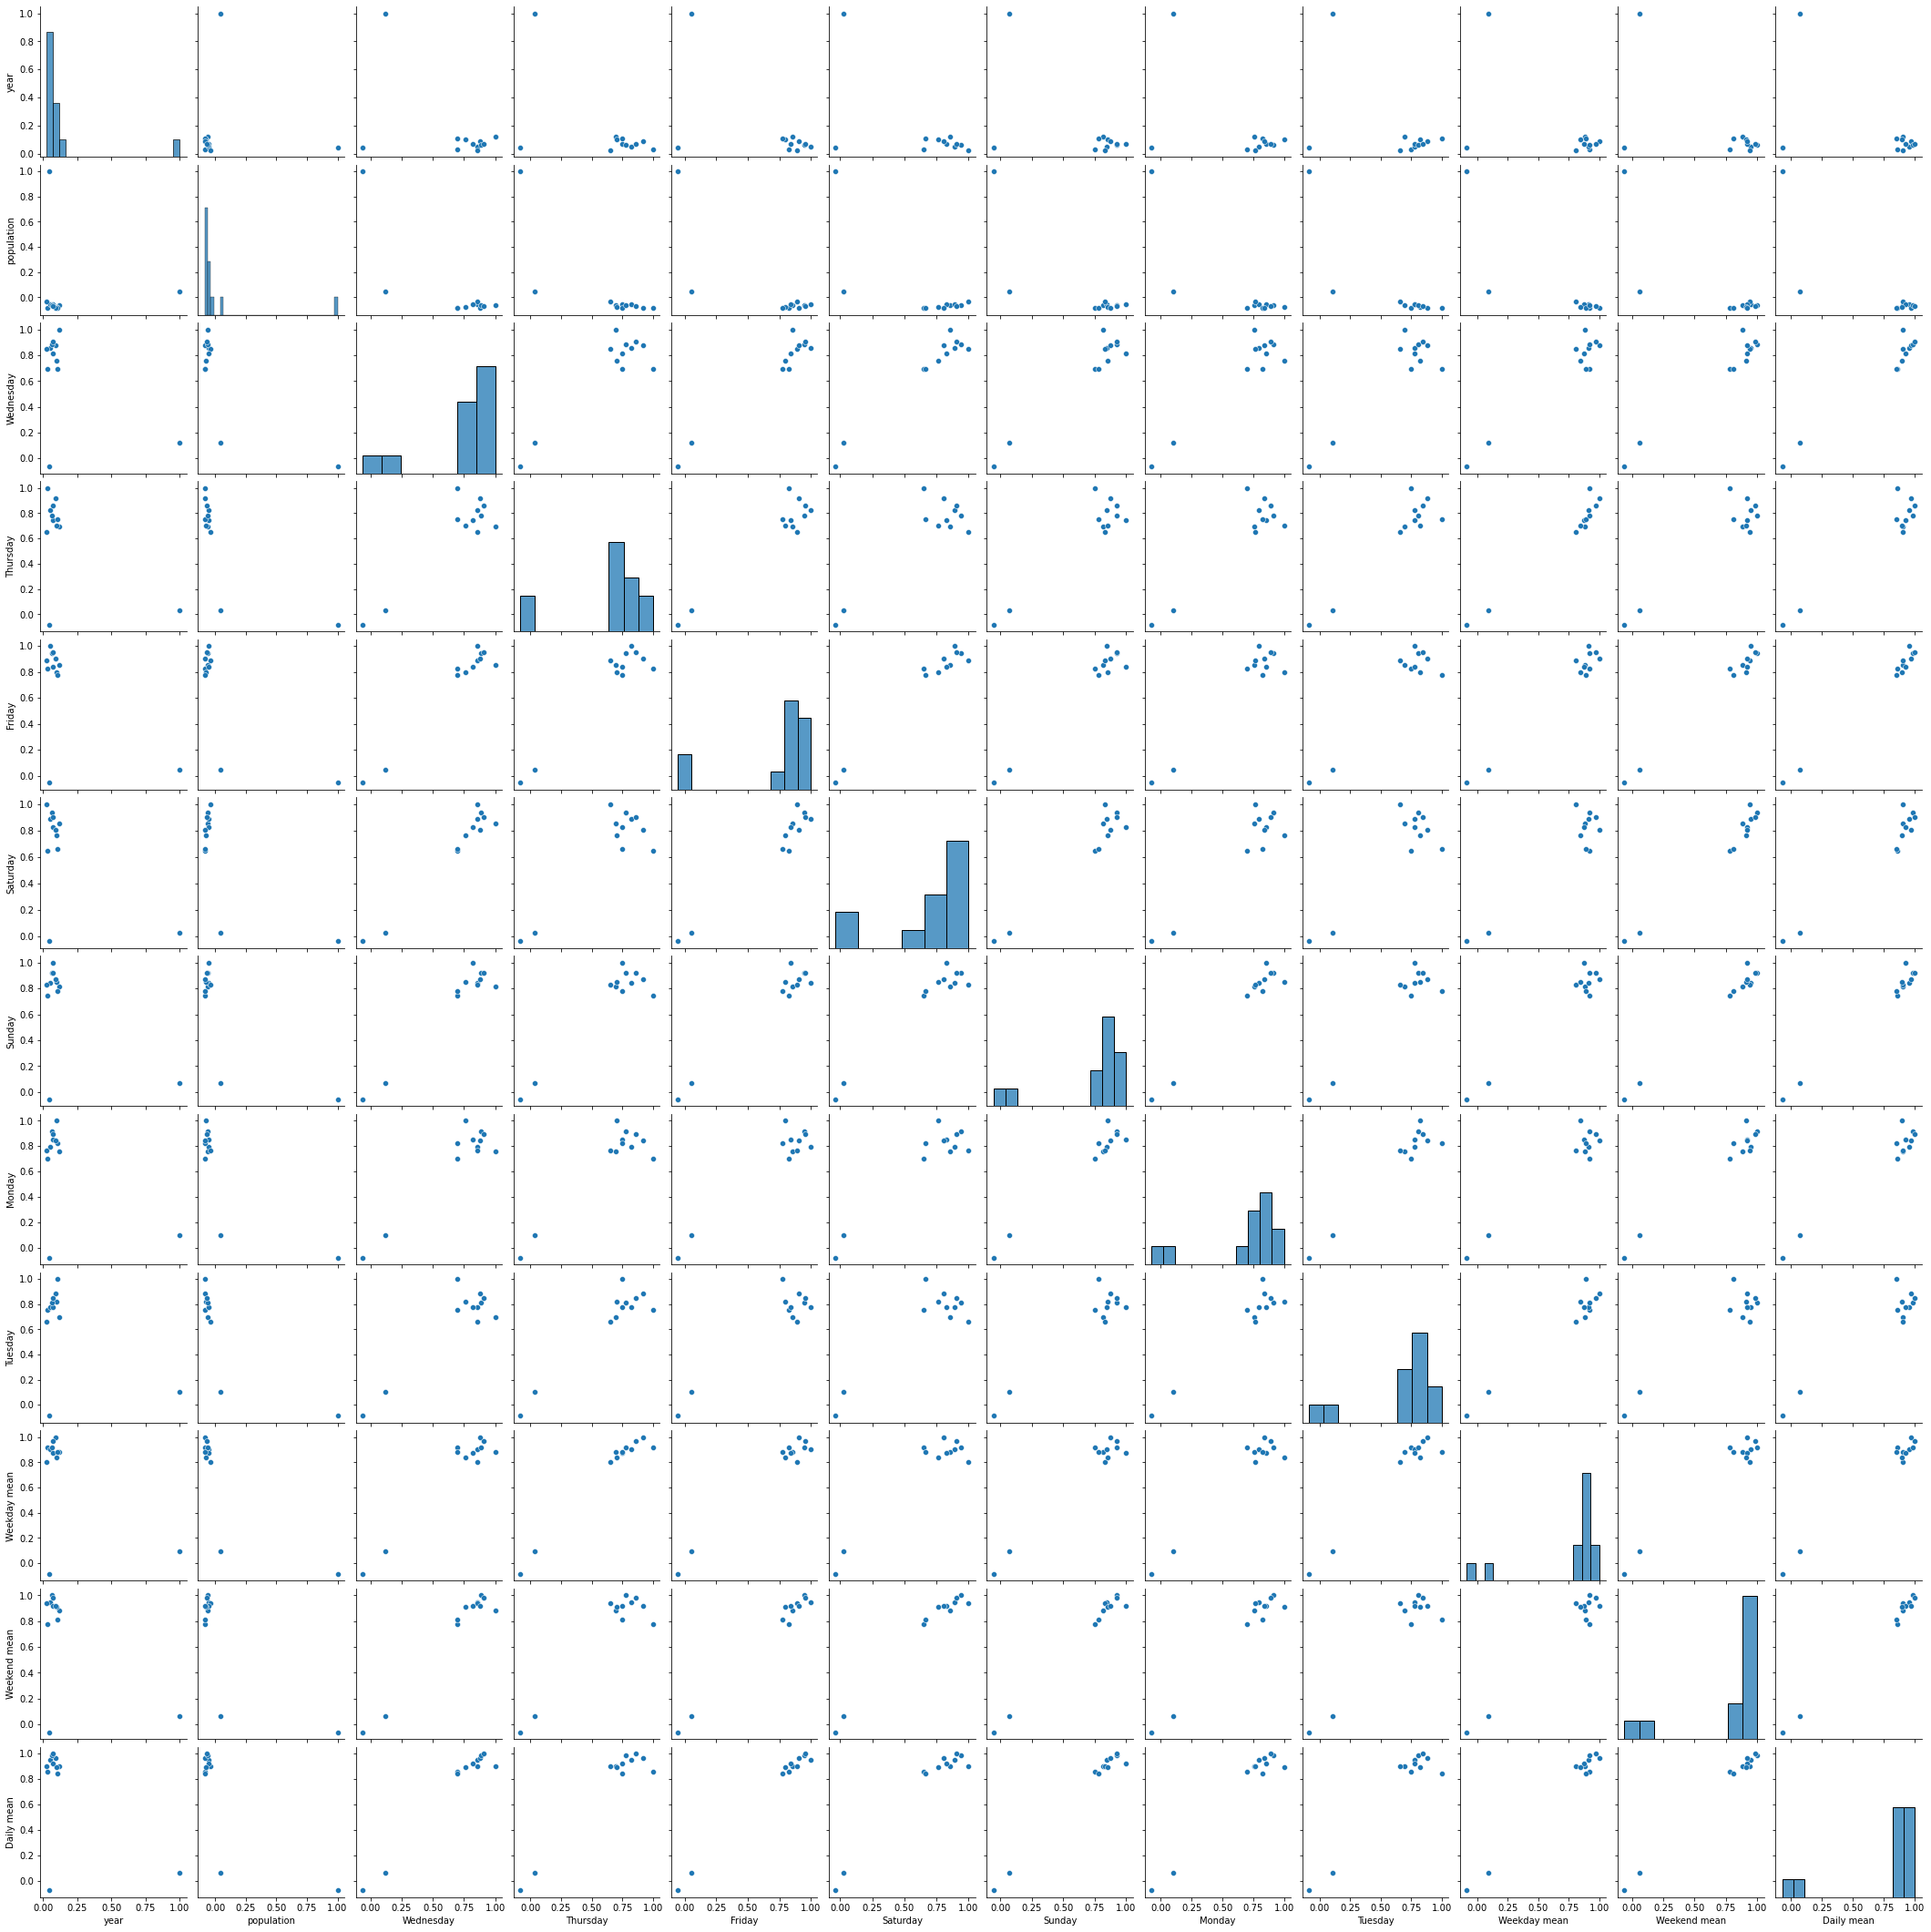

cocaine


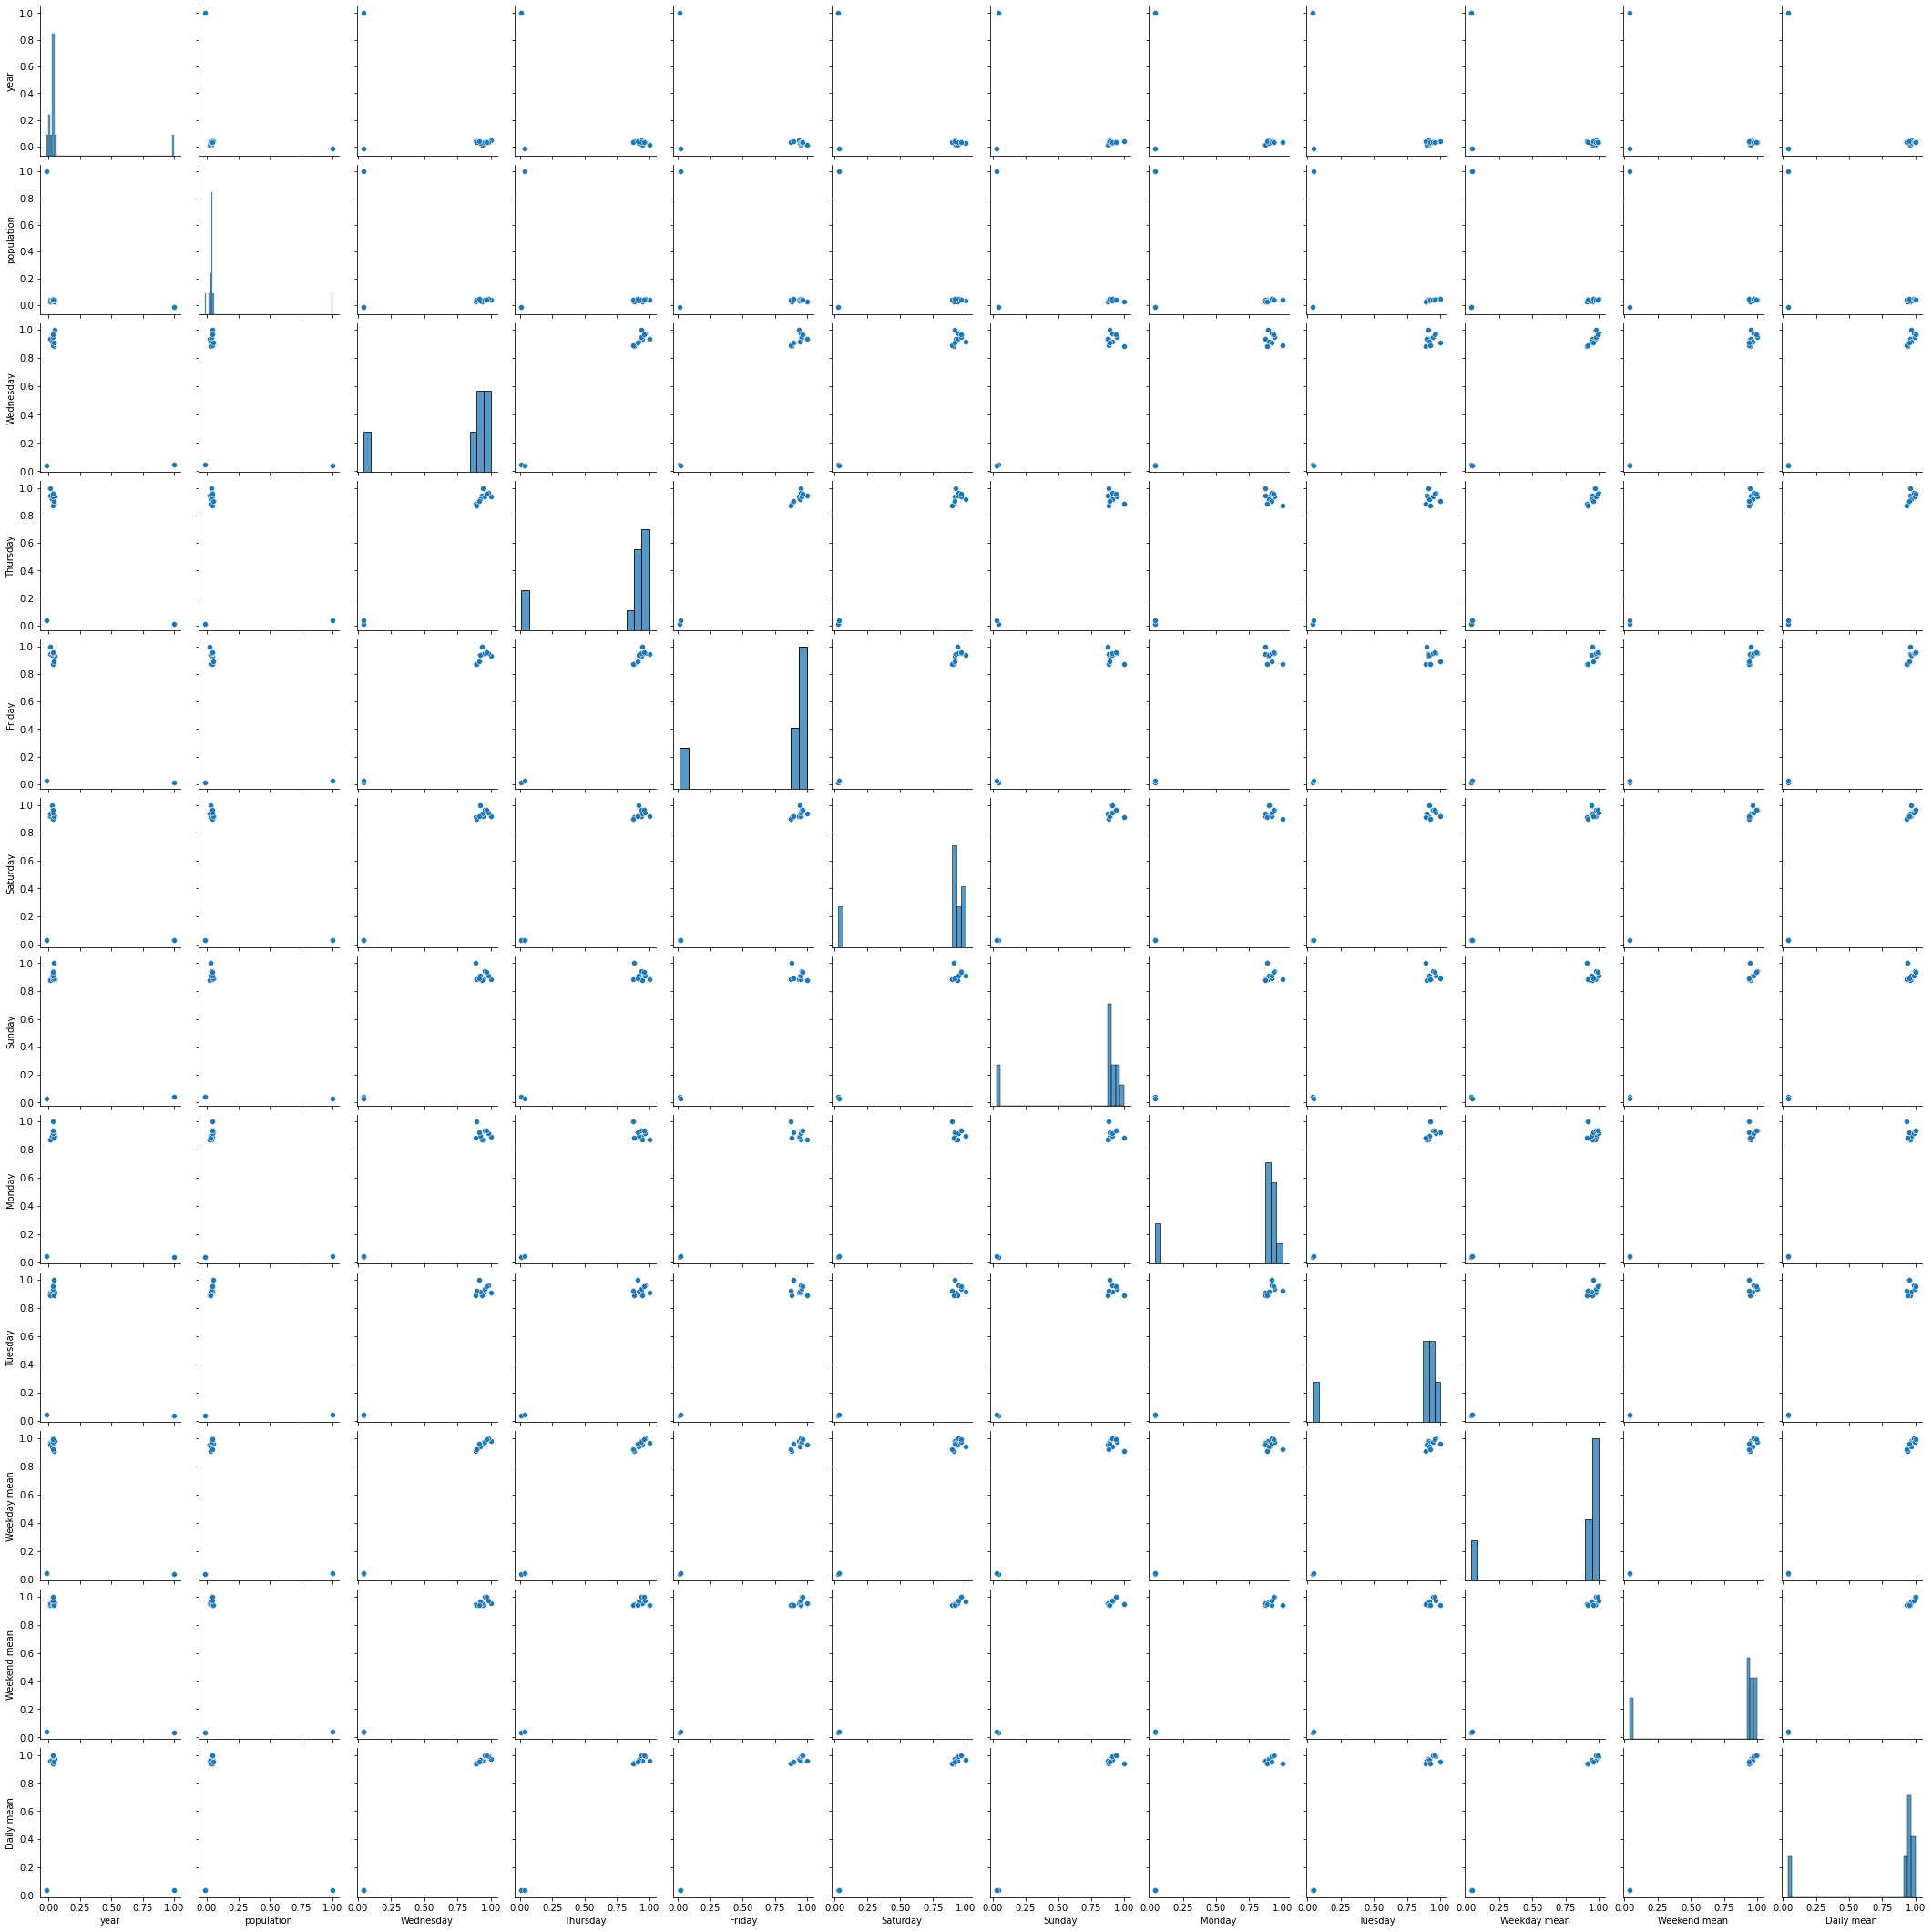

MDMA


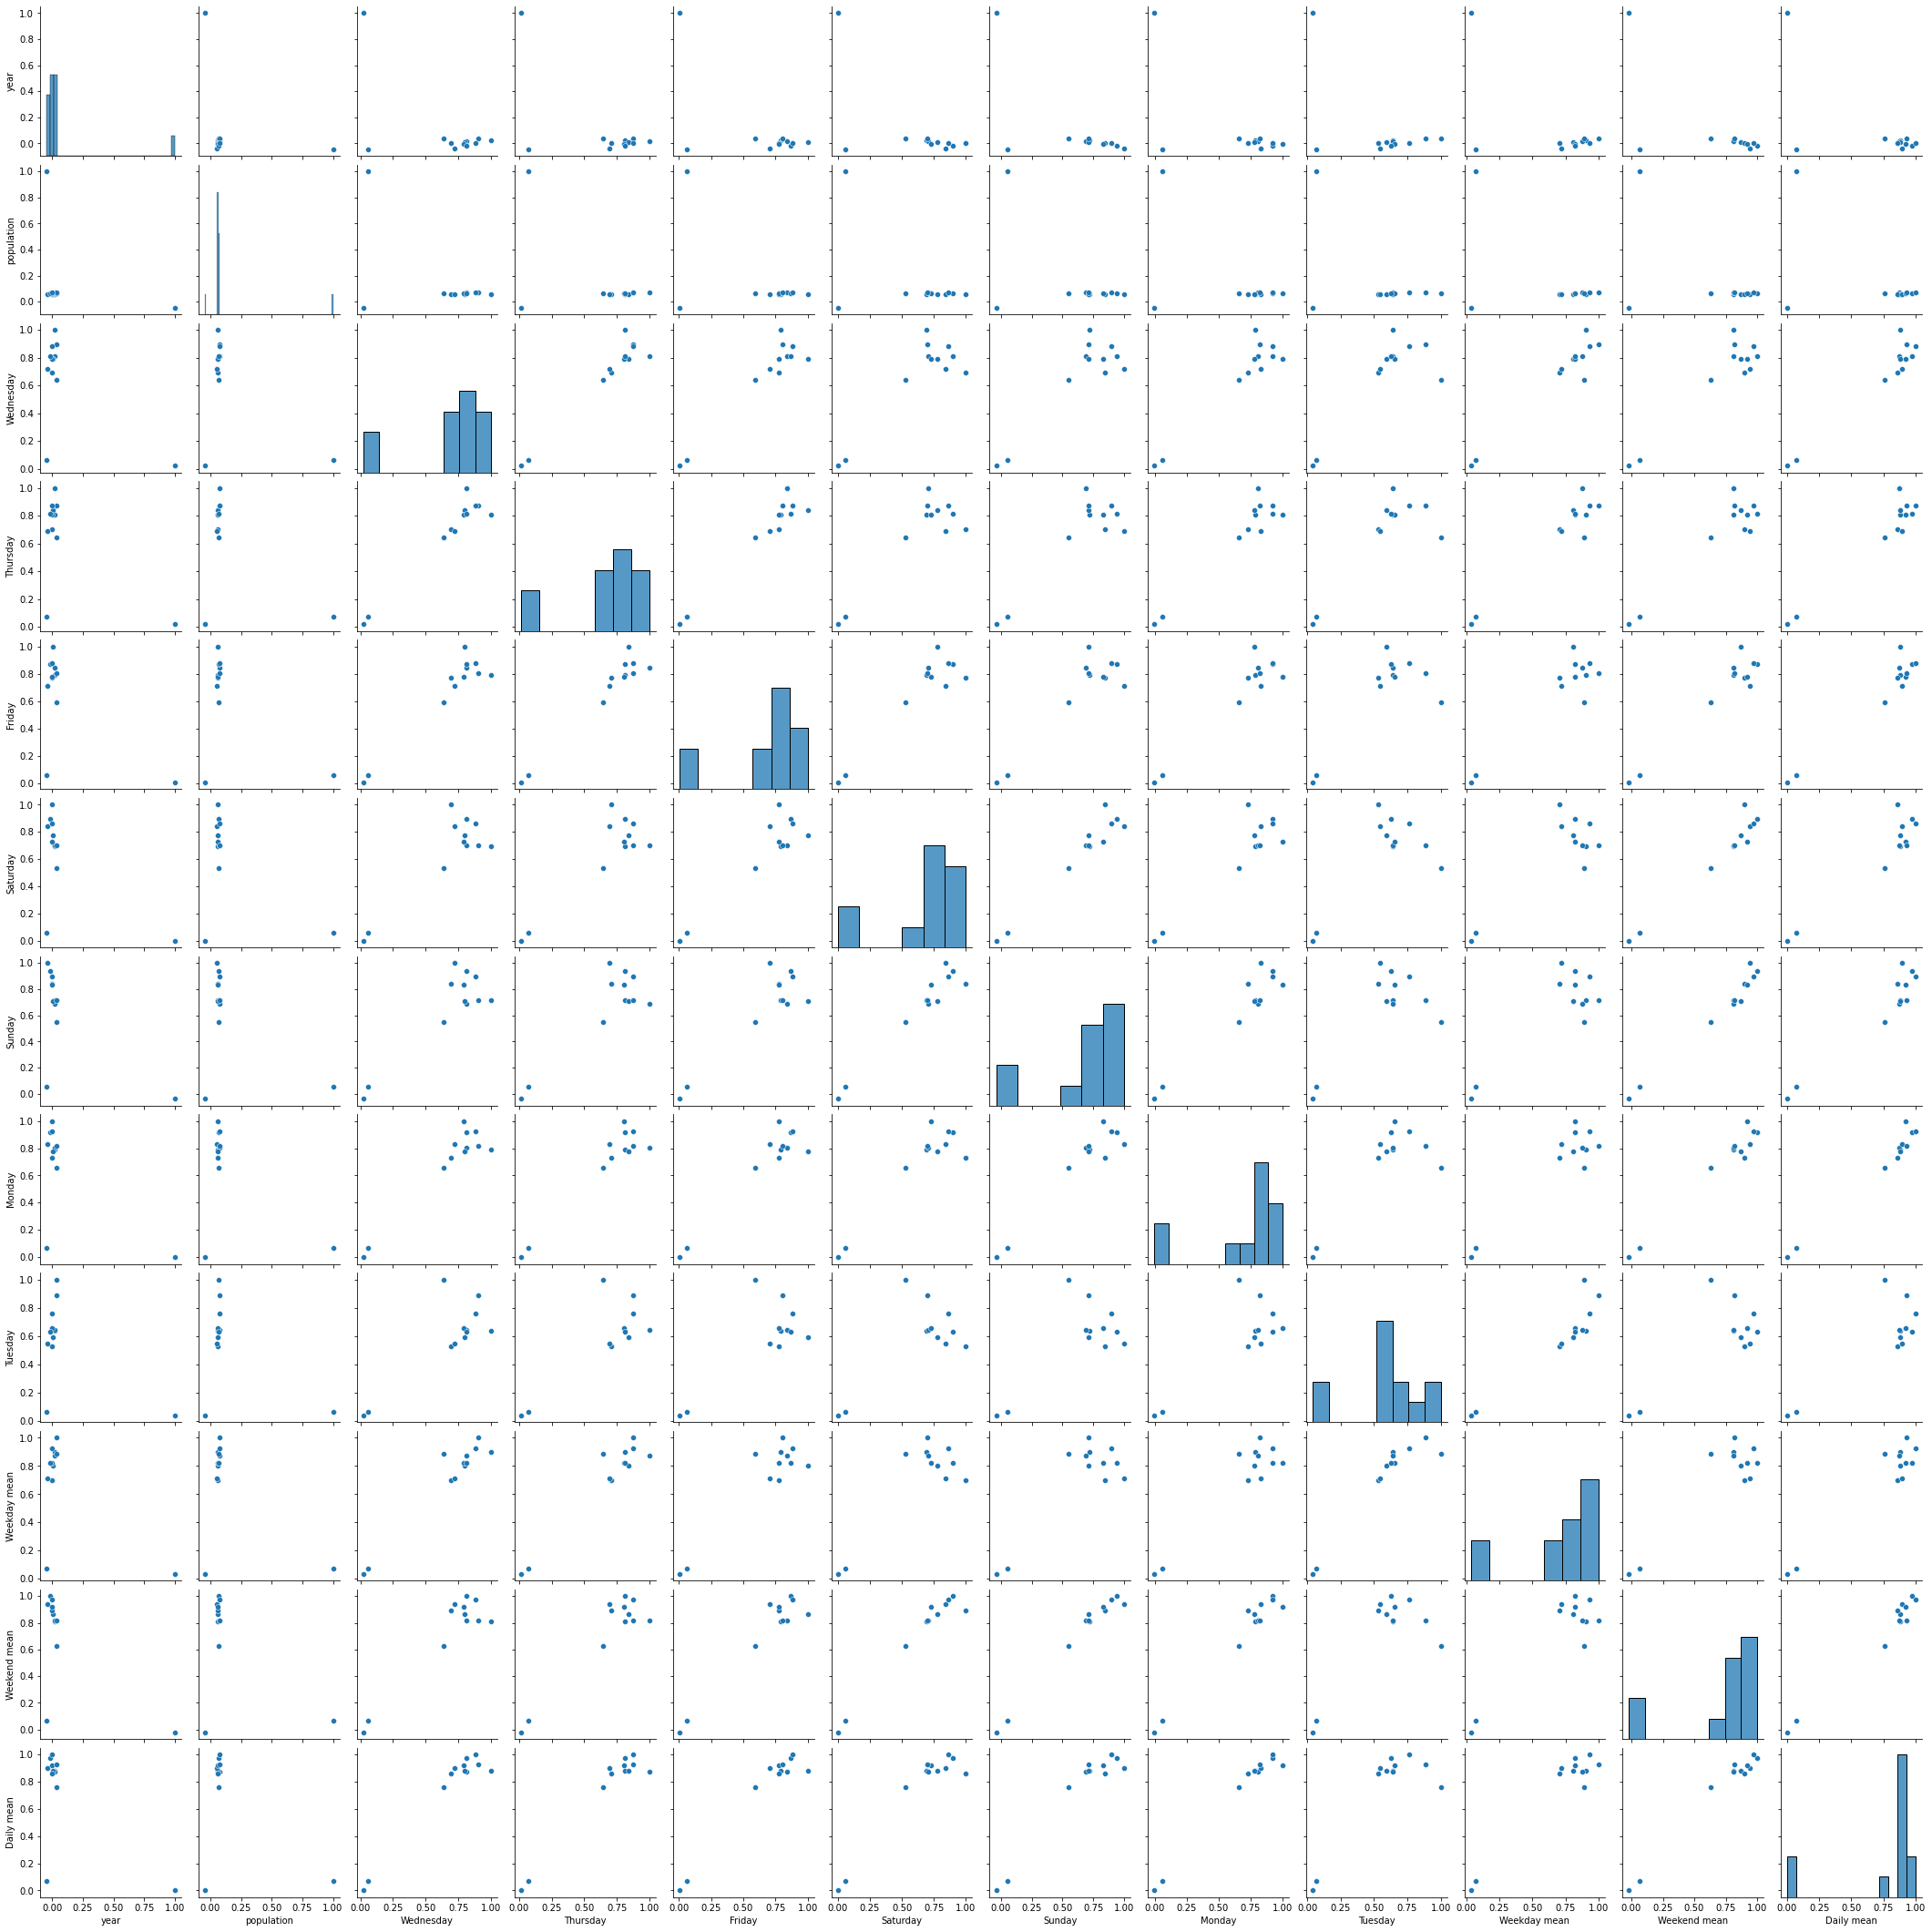

methamphetamine


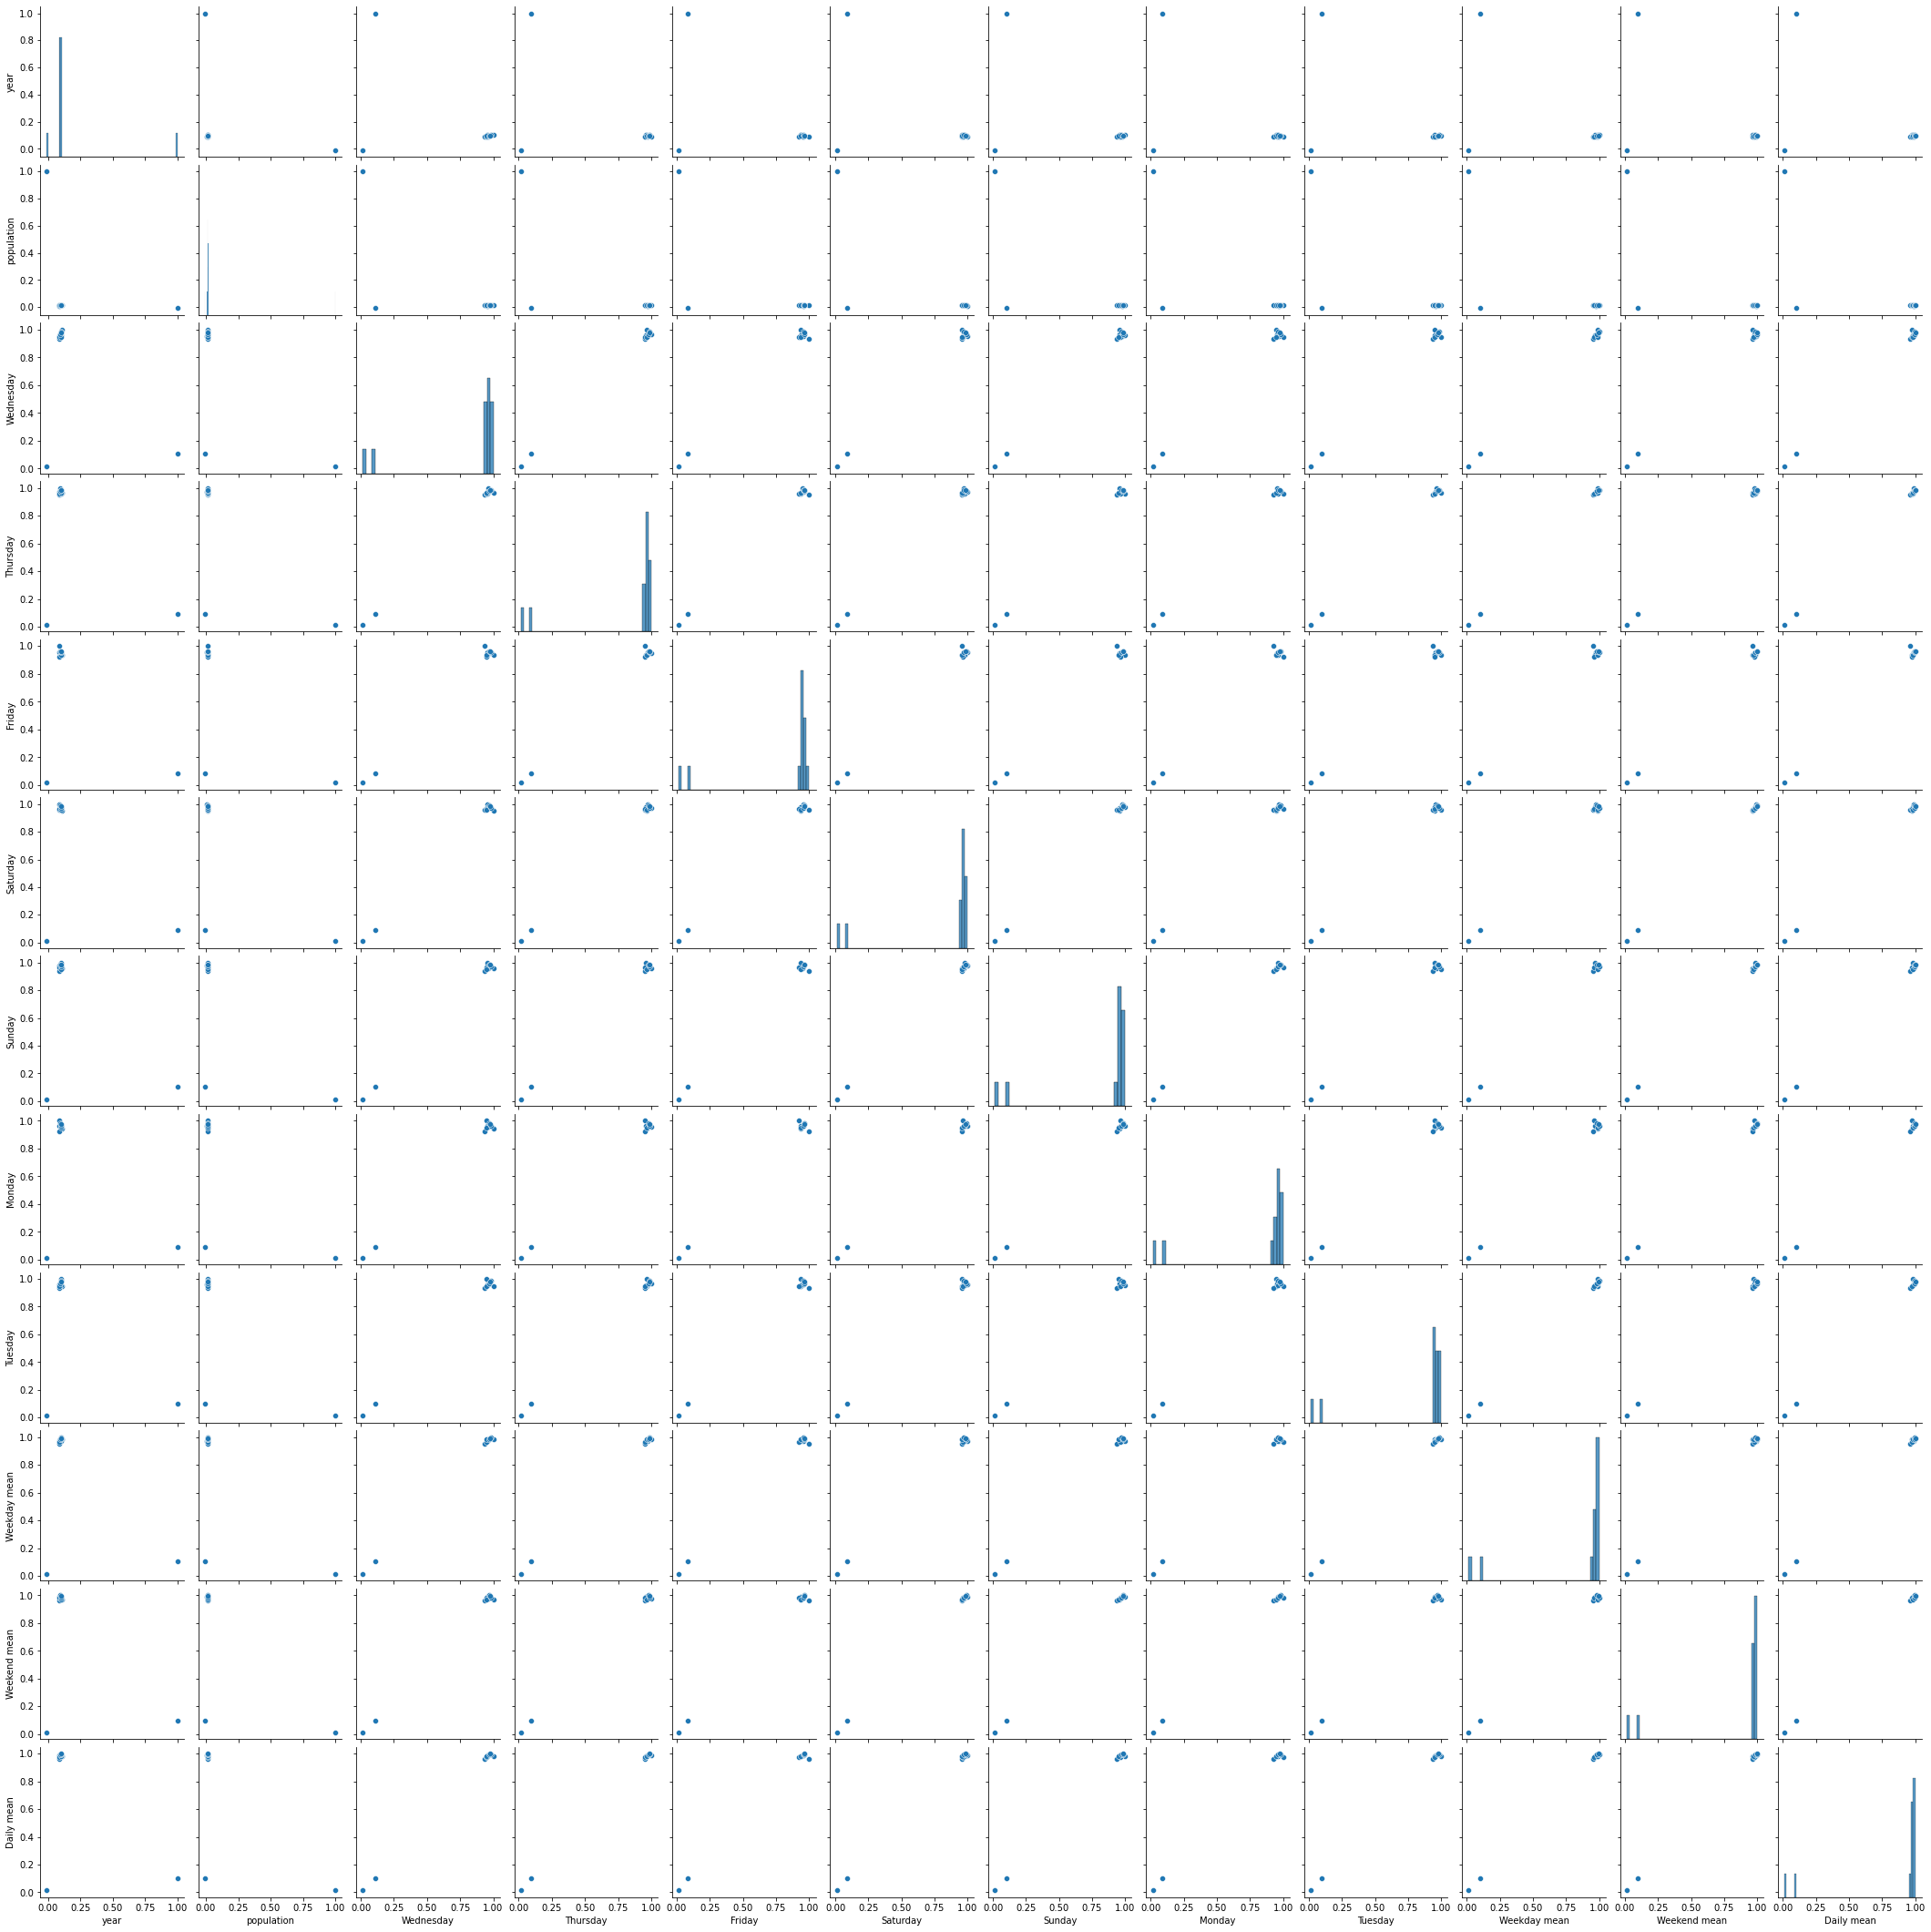

In [9]:
# Looking at the pairplots

df_wastewater_drug_list = list(dict.fromkeys(df_wastewater.metabolite.tolist()))

for i in df_wastewater_drug_list:
    
    df_wastewater_drug_specific = df_wastewater[df_wastewater['metabolite']==i]
    
    sns.pairplot(df_wastewater_drug_specific[['year','population','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Weekday mean','Weekend mean','Daily mean']].corr())
    
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','02 Relation Exploration','Pairplot '+i+'.jpg'),bbox_inches='tight')
        
    print(i)
    
    plt.show();

<h4>
    <font color=0096FF>
        What do the pairplots tell us?
    </font>
</h4>
<p>
    The insight from the pairplots is similar to the insights from the heatmaps. However, one outlier in population is worth to notice. Istanbul with around 15 million citizens, has a low consumption of drugs overall, compared with the rest.
<p>
    Besides this, we can see the spread of the different drug consumption. The narrow cluster of methamphetamine and cocaine in contrast to cannabis, amphetamine and MDMA is perceivable.

In [10]:
df_wastewater['Daily mean'].describe()

count    2569.000000
mean       90.689000
std       158.996037
min         0.000000
25%         6.310000
50%        26.510000
75%        92.530000
max      1581.880000
Name: Daily mean, dtype: float64

In [11]:
df_wastewater.loc[df_wastewater['Daily mean']<6.31, 'Consumption flag'] = 'low consumption'
df_wastewater.loc[(df_wastewater['Daily mean']>=6.31)&(df_wastewater['Daily mean']<92.53), 'Consumption flag'] = 'mid consumption'
df_wastewater.loc[df_wastewater['Daily mean']>=92.53, 'Consumption flag'] = 'high consumption'

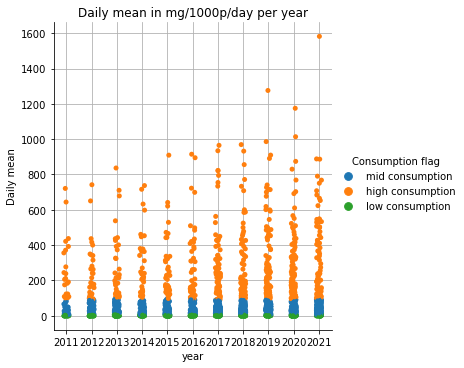

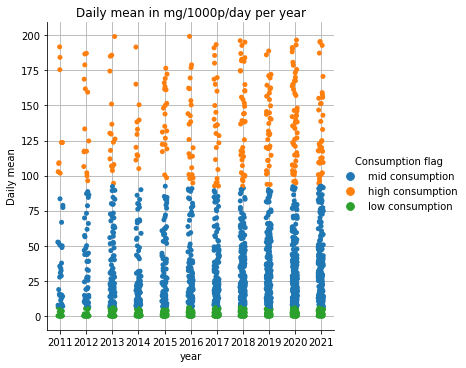

In [12]:
sns.catplot(x='year',y='Daily mean',hue='Consumption flag',data=df_wastewater).set(title='Daily mean in mg/1000p/day per year')
plt.grid()
plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','02 Relation Exploration','Catplot Full.jpg'),bbox_inches='tight')
plt.show()
sns.catplot(x='year',y='Daily mean',hue='Consumption flag',data=df_wastewater.loc[df_wastewater['Daily mean']<200]).set(title='Daily mean in mg/1000p/day per year')
plt.grid()
plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','02 Relation Exploration','Catplot 200.jpg'),bbox_inches='tight')
plt.show()

<h4>
    <font color=0096FF>
        What do the catplots tell us?
    </font>
</h4>
<p>
    As we can see, the spread of the high consumption measures increases over the years and also their measurement range. The same is viewable for the mid consumption measures. However, we need to remember, that the amount of measurements also increase with the years. Therefore, we can't really say if the consumption increases over time. However, we can say, that the drug situation needs further and more research and monitoring, since the amount and the result of the measurements keep increasing.

<h2>
    <font color=0096FF>
        <a href='#start'>3. Answering the previous Questions</a><a id='third_chapter'></a>
    </font>
</h2>

<ul>
    <li>
        The cannabis consumption seems to be rather low in comparison to the consumption of the other drugs. Where is the cannabis consumption higher than the consumption of the other drugs? What trend can be discovered?
    </li>
</ul>

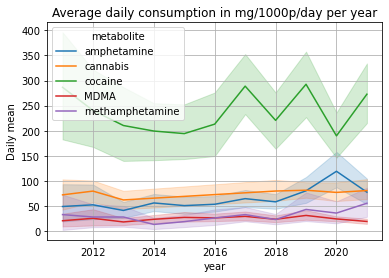

In [13]:
sns.lineplot(x='year',y='Daily mean',hue='metabolite',data=df_wastewater)
plt.title('Average daily consumption in mg/1000p/day per year')
plt.grid()
plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','02 Relation Exploration','Average Daily Consumption per Year.png'),bbox_inches='tight')
plt.show();

In contrast to my assumption, the cannabis consumption is on average the second most consumed drug. Cocaine is the overall most consumed drug, while amphetamine only exceeds cannabis in 2020. Cannabis, MDMA and methamphetamine have a rather unchanging consumption throughout the years. Only cocaine and in one year amphetamine have fluctuations.
<p>

<ul>
    <li>
        Which cities are outliers in the drug consumption?
    </li>
</ul>

In [14]:
df_wastewater['Daily mean'].describe(percentiles=[.1,.98])

count    2569.000000
mean       90.689000
std       158.996037
min         0.000000
10%         0.336000
50%        26.510000
98%       651.968400
max      1581.880000
Name: Daily mean, dtype: float64

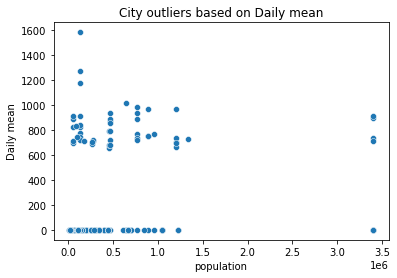

In [15]:
sns.scatterplot(x='population',y='Daily mean',data=df_wastewater.loc[(df_wastewater['Daily mean']<0.336)|(df_wastewater['Daily mean']>651.968)]).set(title='City outliers based on Daily mean');

In [16]:
city_below = list(dict.fromkeys(df_wastewater.loc[df_wastewater['Daily mean']<0.336]['city'].tolist()))
city_above = list(dict.fromkeys(df_wastewater.loc[df_wastewater['Daily mean']>651.968]['city'].tolist()))

In [17]:
len(city_below)
len(city_above)

74

16

74 cities have a daily mean of below 0.336 mg/1000p/day. Please note, that this takes into consideration every drug and every year tested. Therefore, a lot of cities have a measurement result of 0. In contrast, 16 cities have a daily mean of above 651.968 mg/1000p/day. These cities are the top 2 % of drug consumption, and are outliers*:

In [18]:
city_above

['Antwerp Zuid',
 'Brussels',
 'Basel',
 'Geneva',
 'St. Gallen Hofen',
 'Zurich',
 'Ostrava',
 'Prague (2)',
 'Barcelona',
 'Bristol',
 'Zagreb',
 'Amsterdam',
 'Gävle',
 'Castellon',
 'Reykjavik Klettagarðar',
 'London']

<i>* The 98% percentile was chosen, to reduce the amount of cities. Since this takes, again, into consideration every drug and year tested.</i>

<ul>
    <li>
        Is there a connection, and how strong is this connection, between the amount of mg/1000p/day in the wastewater and the population of the specific cities?
    </li>
</ul>

In [19]:
df_wastewater[['population','Daily mean']].corr()

,population,Daily mean
population,1.000000,0.007699
Daily mean,0.007699,1.000000


There is a very small correlation which falls into the category of having a weak correlation (<0.3).

<ul>
    <li>
        How much is the average difference between weekday and weekend consumption?
    </li>
</ul>

In [20]:
df_wastewater['avg diff weekend-weekday'] = df_wastewater['Weekend mean']-df_wastewater['Weekday mean']

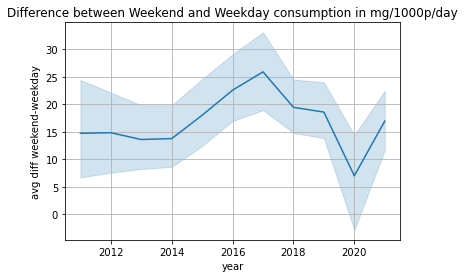

In [21]:
sns.lineplot(x='year',y='avg diff weekend-weekday',data=df_wastewater).set(title='Difference between Weekend and Weekday consumption in mg/1000p/day')
plt.grid()
plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','02 Relation Exploration','Diff Weekend Weekday.png'),bbox_inches='tight')
plt.show();

As we can see, the average consumption on weekends is around 10-25 mg/1000p/day higher than on weekdays. Noticeable is the drop in 2020, meaning that the weekday consumption in the pandemic aligned more to the levels of the weekend.

<ul>
    <li>
        How did the global pandemic influence the drug consumption?
    </li>
</ul>
<p>
    To summarize, in the pandemic year 2020, the consumption of weekend and weekdays aligned more than in the other years. However, it reached levels similar to the pre-pandemic situation in 2021. Besides this, in 2020 the consumption of cocaine dropped, whereas the consumption of MDMA peaked.

<h2>
    <font color=0096FF>
        <a href='#start'>4. Going further</a><a id='fourth_chapter'></a>
    </font>
</h2>

<p>
    The findings to this point are rather disappointing. Meaning, that the relationship between the consumption days is high, was obvious beforehand. However, the consumption impact inbetween the specific drugs leaves an opportunity to dig deeper.
<p>
    The problem here is, that the observations are not coherent throughout the time. Finding stations that monitor the 4 most observed drugs is difficult:

In [22]:
# This code creates a hitlist of the stations that cover Amphetamine, Methamphetamine, Cocaine, and MDMA in the same year
hit_list=[]
amp_list=list(dict.fromkeys(df_wastewater.loc[(df_wastewater['metabolite']=='amphetamine')]['SiteID'].tolist()))
met_list=list(dict.fromkeys(df_wastewater.loc[(df_wastewater['metabolite']=='methamphetamine')]['SiteID'].tolist()))
coc_list=list(dict.fromkeys(df_wastewater.loc[(df_wastewater['metabolite']=='cocaine')]['SiteID'].tolist()))
mdm_list=list(dict.fromkeys(df_wastewater.loc[(df_wastewater['metabolite']=='MDMA')]['SiteID'].tolist()))

for i in range(0,139):
    if (amp_list[i]==met_list[i])&(amp_list[i]==coc_list[i])&(amp_list[i]==mdm_list[i]):
        hit_list.append(amp_list[i])
        #print(amp_list[i],met_list[i],coc_list[i],mdm_list[i])
print(len(hit_list))

30


Only 30 stations throughout the years manage to observe the 4 most popular drugs. This leaves the question, if we seperate the drugs and look at them two at a time seperately, how many stations would monitor them?
<p>

In [23]:
# This code creates a hit list with 2 drugs at a time

ampxmet_list=[]
ampxcoc_list=[]
ampxmdm_list=[]
ampxcan_list=[]
metxcoc_list=[]
metxmdm_list=[]
metxcan_list=[]
cocxmdm_list=[]
cocxcan_list=[]
mdmxcan_list=[]

hit_list=[
    ampxmet_list,
    ampxcoc_list,
    ampxmdm_list,
    ampxcan_list,
    metxcoc_list,
    metxmdm_list,
    metxcan_list,
    cocxmdm_list,
    cocxcan_list,
    mdmxcan_list]

amp_list=list(dict.fromkeys(df_wastewater.loc[(df_wastewater['metabolite']=='amphetamine')]['SiteID'].tolist()))#0
met_list=list(dict.fromkeys(df_wastewater.loc[(df_wastewater['metabolite']=='methamphetamine')]['SiteID'].tolist()))#1
coc_list=list(dict.fromkeys(df_wastewater.loc[(df_wastewater['metabolite']=='cocaine')]['SiteID'].tolist()))#2
mdm_list=list(dict.fromkeys(df_wastewater.loc[(df_wastewater['metabolite']=='MDMA')]['SiteID'].tolist()))#3
can_list=list(dict.fromkeys(df_wastewater.loc[(df_wastewater['metabolite']=='cannabis')]['SiteID'].tolist()))#4

run_list=[amp_list,met_list,coc_list,mdm_list,can_list]
targeta=[0,0,0,0,1,1,1,2,2,3]
targetb=[1,2,3,4,2,3,4,3,4,4]

name_list=['Amphetamine','Methamphetamine','Cocaine','MDMA','Cannabis']

for r in range(0,10):
    for i in run_list[targeta[r]]:
        for g in run_list[targetb[r]]:
            if i==g:
                hit_list[r].append(i)

for x in range(0,10):
    print(len(hit_list[x]),name_list[targeta[x]],'with',name_list[targetb[x]])

140 Amphetamine with Methamphetamine
138 Amphetamine with Cocaine
138 Amphetamine with MDMA
70 Amphetamine with Cannabis
140 Methamphetamine with Cocaine
139 Methamphetamine with MDMA
71 Methamphetamine with Cannabis
138 Cocaine with MDMA
72 Cocaine with Cannabis
71 MDMA with Cannabis


<b>This is a bit more encouraging, with a range of 70-140 stations that cover these drug combinations, lets create a dataframe for each combination and a correlation chart with a scatterplot.</b>

In [24]:
# This code creates a specific dataframe for each drug combination. It is somewhat of an automated hybrid.
# Besides the dataframe, it also gives a short monitoring output to control if everything worked accordingly.

df_amp = df_wastewater.loc[df_wastewater['metabolite']=='amphetamine'][['year','SiteID','country','city','latitude','longitude','population','Daily mean']]
df_met = df_wastewater.loc[df_wastewater['metabolite']=='methamphetamine'][['year','SiteID','country','city','latitude','longitude','population','Daily mean']]
df_coc = df_wastewater.loc[df_wastewater['metabolite']=='cocaine'][['year','SiteID','country','city','latitude','longitude','population','Daily mean']]
df_can = df_wastewater.loc[df_wastewater['metabolite']=='cannabis'][['year','SiteID','country','city','latitude','longitude','population','Daily mean']]
df_mdm = df_wastewater.loc[df_wastewater['metabolite']=='MDMA'][['year','SiteID','country','city','latitude','longitude','population','Daily mean']]

df_amp.rename(columns={'Daily mean':'Amp Daily mean'},inplace=True)
df_met.rename(columns={'Daily mean':'Met Daily mean'},inplace=True)
df_coc.rename(columns={'Daily mean':'Coc Daily mean'},inplace=True)
df_can.rename(columns={'Daily mean':'Can Daily mean'},inplace=True)
df_mdm.rename(columns={'Daily mean':'MDM Daily mean'},inplace=True)

df_amp['yearID'] = df_amp['SiteID'].astype(str)+df_amp['year'].astype(str)
df_met['yearID'] = df_met['SiteID'].astype(str)+df_met['year'].astype(str)
df_coc['yearID'] = df_coc['SiteID'].astype(str)+df_coc['year'].astype(str)
df_can['yearID'] = df_can['SiteID'].astype(str)+df_can['year'].astype(str)
df_mdm['yearID'] = df_mdm['SiteID'].astype(str)+df_mdm['year'].astype(str)

df_drugxdrug=[]

targeta=[0,0,0,0,1,1,1,2,2,3]
targetb=[1,2,3,4,2,3,4,3,4,4]

run_hit_list = [df_amp,df_met,df_coc,df_can,df_mdm]
run_col_list = ['Amp Daily mean','Met Daily mean','Coc Daily mean','Can Daily mean','MDM Daily mean']

for r in range(0,10):
    df_drugxdrug.append(pd.merge(run_hit_list[targeta[r]],run_hit_list[targetb[r]][['yearID',run_col_list[targetb[r]]]],how='inner',on='yearID'));
    print(run_col_list[targeta[r]],run_col_list[targetb[r]])
    df_drugxdrug[r].drop('yearID',axis=1,inplace=True)
    df_drugxdrug[r].head()
    df_drugxdrug[r].shape
    df_drugxdrug[r]['SiteID'].nunique()

Amp Daily mean Met Daily mean


,year,SiteID,country,city,latitude,longitude,population,Amp Daily mean,Met Daily mean
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,38.57,13.09
1,2020,AT001,AT,Graz,47.070713,15.439504,487040,29.27,7.27
2,2019,AT001,AT,Graz,47.070713,15.439504,487040,26.67,5.68
3,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,6.97,3.96
4,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,9.05,3.96


(561, 9)

140

Amp Daily mean Coc Daily mean


,year,SiteID,country,city,latitude,longitude,population,Amp Daily mean,Coc Daily mean
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,38.57,138.65
1,2020,AT001,AT,Graz,47.070713,15.439504,487040,29.27,138.22
2,2019,AT001,AT,Graz,47.070713,15.439504,487040,26.67,154.19
3,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,6.97,204.80
4,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,9.05,210.32


(567, 9)

138

Amp Daily mean Can Daily mean


,year,SiteID,country,city,latitude,longitude,population,Amp Daily mean,Can Daily mean
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,38.57,87.17
1,2020,AT001,AT,Graz,47.070713,15.439504,487040,29.27,50.69
2,2019,AT001,AT,Graz,47.070713,15.439504,487040,26.67,59.61
3,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,6.97,36.21
4,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,9.05,43.17


(195, 9)

70

Amp Daily mean MDM Daily mean


,year,SiteID,country,city,latitude,longitude,population,Amp Daily mean,MDM Daily mean
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,38.57,9.64
1,2020,AT001,AT,Graz,47.070713,15.439504,487040,29.27,14.14
2,2019,AT001,AT,Graz,47.070713,15.439504,487040,26.67,17.39
3,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,6.97,4.27
4,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,9.05,8.12


(565, 9)

138

Met Daily mean Coc Daily mean


,year,SiteID,country,city,latitude,longitude,population,Met Daily mean,Coc Daily mean
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,13.09,138.65
1,2020,AT001,AT,Graz,47.070713,15.439504,487040,7.27,138.22
2,2019,AT001,AT,Graz,47.070713,15.439504,487040,5.68,154.19
3,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,3.96,204.80
4,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,3.96,210.32


(578, 9)

140

Met Daily mean Can Daily mean


,year,SiteID,country,city,latitude,longitude,population,Met Daily mean,Can Daily mean
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,13.09,87.17
1,2020,AT001,AT,Graz,47.070713,15.439504,487040,7.27,50.69
2,2019,AT001,AT,Graz,47.070713,15.439504,487040,5.68,59.61
3,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,3.96,36.21
4,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,3.96,43.17


(201, 9)

71

Met Daily mean MDM Daily mean


,year,SiteID,country,city,latitude,longitude,population,Met Daily mean,MDM Daily mean
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,13.09,9.64
1,2020,AT001,AT,Graz,47.070713,15.439504,487040,7.27,14.14
2,2019,AT001,AT,Graz,47.070713,15.439504,487040,5.68,17.39
3,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,3.96,4.27
4,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,3.96,8.12


(570, 9)

139

Coc Daily mean Can Daily mean


,year,SiteID,country,city,latitude,longitude,population,Coc Daily mean,Can Daily mean
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,138.65,87.17
1,2020,AT001,AT,Graz,47.070713,15.439504,487040,138.22,50.69
2,2019,AT001,AT,Graz,47.070713,15.439504,487040,154.19,59.61
3,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,204.80,36.21
4,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,210.32,43.17


(210, 9)

72

Coc Daily mean MDM Daily mean


,year,SiteID,country,city,latitude,longitude,population,Coc Daily mean,MDM Daily mean
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,138.65,9.64
1,2020,AT001,AT,Graz,47.070713,15.439504,487040,138.22,14.14
2,2019,AT001,AT,Graz,47.070713,15.439504,487040,154.19,17.39
3,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,204.80,4.27
4,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,210.32,8.12


(581, 9)

138

Can Daily mean MDM Daily mean


,year,SiteID,country,city,latitude,longitude,population,Can Daily mean,MDM Daily mean
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,87.17,9.64
1,2020,AT001,AT,Graz,47.070713,15.439504,487040,50.69,14.14
2,2019,AT001,AT,Graz,47.070713,15.439504,487040,59.61,17.39
3,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,36.21,4.27
4,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,43.17,8.12


(200, 9)

71

Text(0.5, 1.0, 'Amp Daily mean x Met Daily mean scatterplot in mg/1000p/day')

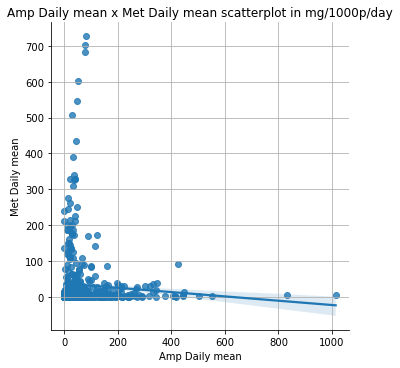

,Amp Daily mean,Met Daily mean
Amp Daily mean,1.000000,-0.070419
Met Daily mean,-0.070419,1.000000


Text(0.5, 1.0, 'Amp Daily mean x Coc Daily mean scatterplot in mg/1000p/day')

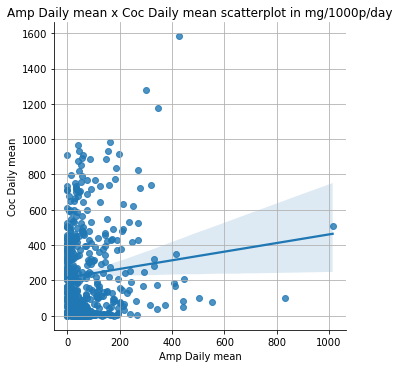

,Amp Daily mean,Coc Daily mean
Amp Daily mean,1.000000,0.101426
Coc Daily mean,0.101426,1.000000


Text(0.5, 1.0, 'Amp Daily mean x Can Daily mean scatterplot in mg/1000p/day')

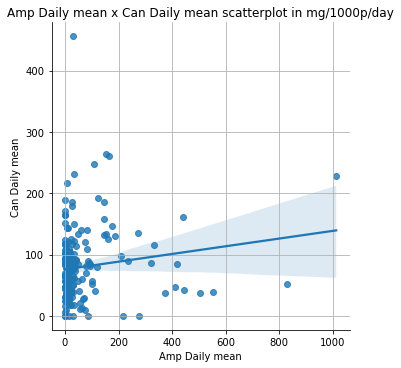

,Amp Daily mean,Can Daily mean
Amp Daily mean,1.000000,0.139686
Can Daily mean,0.139686,1.000000


Text(0.5, 1.0, 'Amp Daily mean x MDM Daily mean scatterplot in mg/1000p/day')

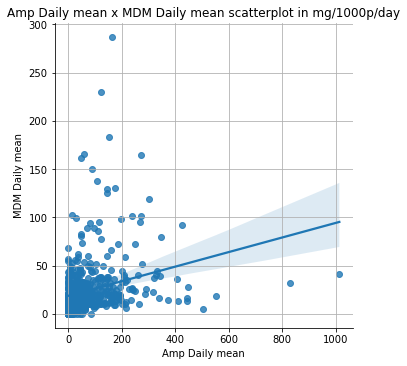

,Amp Daily mean,MDM Daily mean
Amp Daily mean,1.000000,0.263823
MDM Daily mean,0.263823,1.000000


Text(0.5, 1.0, 'Met Daily mean x Coc Daily mean scatterplot in mg/1000p/day')

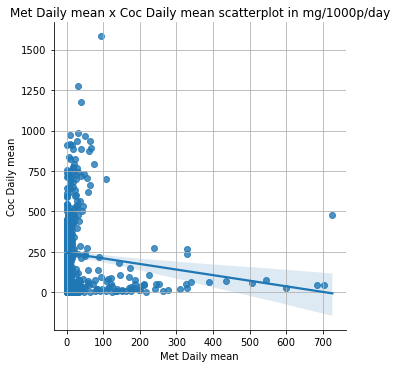

,Met Daily mean,Coc Daily mean
Met Daily mean,1.00000,-0.12245
Coc Daily mean,-0.12245,1.00000


Text(0.5, 1.0, 'Met Daily mean x Can Daily mean scatterplot in mg/1000p/day')

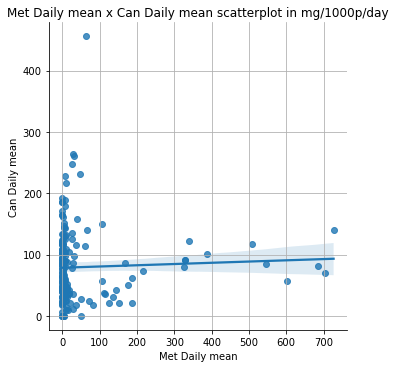

,Met Daily mean,Can Daily mean
Met Daily mean,1.000000,0.041873
Can Daily mean,0.041873,1.000000


Text(0.5, 1.0, 'Met Daily mean x MDM Daily mean scatterplot in mg/1000p/day')

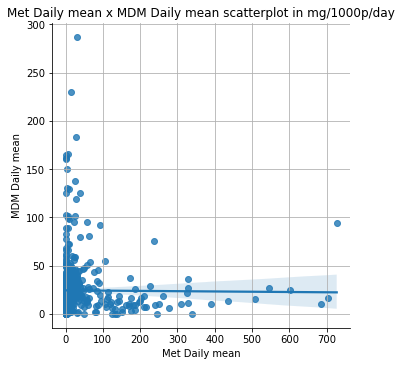

,Met Daily mean,MDM Daily mean
Met Daily mean,1.000000,-0.008384
MDM Daily mean,-0.008384,1.000000


Text(0.5, 1.0, 'Coc Daily mean x Can Daily mean scatterplot in mg/1000p/day')

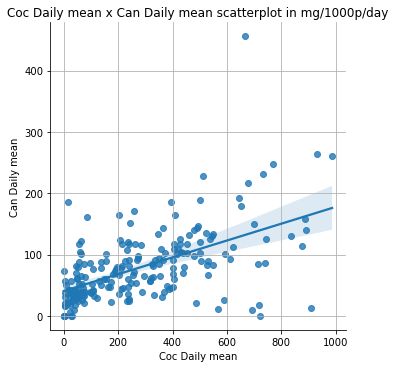

,Coc Daily mean,Can Daily mean
Coc Daily mean,1.000000,0.556532
Can Daily mean,0.556532,1.000000


Text(0.5, 1.0, 'Coc Daily mean x MDM Daily mean scatterplot in mg/1000p/day')

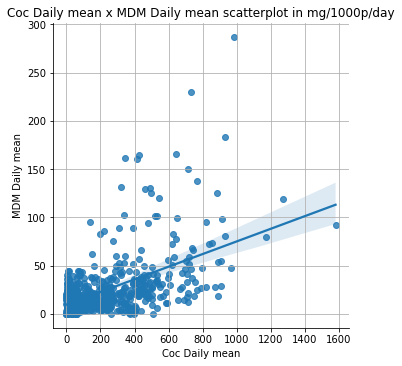

,Coc Daily mean,MDM Daily mean
Coc Daily mean,1.000000,0.530169
MDM Daily mean,0.530169,1.000000


Text(0.5, 1.0, 'Can Daily mean x MDM Daily mean scatterplot in mg/1000p/day')

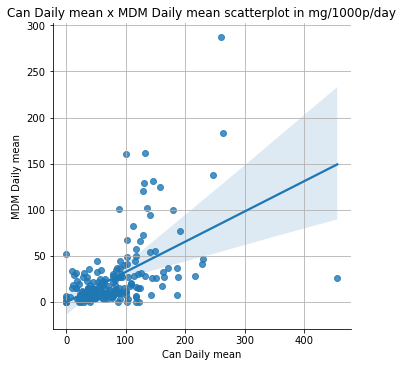

,Can Daily mean,MDM Daily mean
Can Daily mean,1.000000,0.528155
MDM Daily mean,0.528155,1.000000


In [25]:
# This code creates and saves a drug combination specific scatterplot and a correlation table.

targeta=[0,0,0,0,1,1,1,2,2,3]
targetb=[1,2,3,4,2,3,4,3,4,4]
run_col_list = ['Amp Daily mean','Met Daily mean','Coc Daily mean','Can Daily mean','MDM Daily mean']

for i in range(0,10):
    sns.lmplot(x=run_col_list[targeta[i]],y=run_col_list[targetb[i]],data=df_drugxdrug[i])
    plt.title(run_col_list[targeta[i]]+' x '+run_col_list[targetb[i]]+' scatterplot in mg/1000p/day')
    plt.grid()
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','02 Relation Exploration',run_col_list[targeta[i]]+' x '+run_col_list[targetb[i]]+'.png'),bbox_inches='tight')
    plt.show()
    df_drugxdrug[i][[run_col_list[targeta[i]],run_col_list[targetb[i]]]].corr()

To summarize, the combinations: Cannabis & MDMA, Cocaine & MDMA, and Cocaine & Cannabis show a strong positive correlation. The combinations: Methamphetamine & Cocaine, and Amphetamine & Methamphetamine show a weak negative correlation. The rest combinations show weak positive and one (non-existent) very weak negative correlation.
<p>
    <b>The positive correlation between Cannabis, MDMA, and Cocaine is interesting and will be tested in the upcoming analysis.</b>

<h2>
    <font color=0096FF>
        <a href='#start'>5. Export and further Questions</a><a id='fifth_chapter'></a>
    </font>
</h2>

The finding of the relationship between Cannabis, MDMA, and Cocaine is interesting and needs further research. In this notebook I only tested the daily average. Therefore I'd like to expand the dataframe with the daily measures as well.
In a nutshell, my hypothesis for the further research is as follows:

<ul>
    <li>
        <b>If the consumption of Cannabis increases, the consumption of MDMA and Cocaine increases as well.</b>
    </li>
</ul>

In [26]:
# Exporting the dataframes

df_wastewater.to_pickle(os.path.join(path,'02 Data','02 Prepared Data','df_wastewater_post_6-2.pkl'))
df_wastewater.to_csv(os.path.join(path,'02 Data','02 Prepared Data','df_wastewater_post_6-2.csv'))

targeta=[0,0,0,0,1,1,1,2,2,3]
targetb=[1,2,3,4,2,3,4,3,4,4]
run_col_list = ['Amp Daily mean','Met Daily mean','Coc Daily mean','Can Daily mean','MDM Daily mean']

for i in range(0,10):
    df_drugxdrug[i].to_pickle(os.path.join(path,'02 Data','02 Prepared Data',run_col_list[targeta[i]]+' x '+run_col_list[targetb[i]]+' df_post_6-2.pkl'))
    df_drugxdrug[i].to_csv(os.path.join(path,'02 Data','02 Prepared Data',run_col_list[targeta[i]]+' x '+run_col_list[targetb[i]]+' df_post_6-2.csv'))